### Problem Statement

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Target/Aim

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression



### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv('avocado.csv')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
df.shape

(18249, 14)

It contains 18249 rows and 14 columns

In [4]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

First 5 rows of the dataset

In [5]:
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

Last 5 rows of the dataset

In [6]:
df.sample(3)

Unnamed: 0        Date  AveragePrice  Total Volume       4046  \
3406           26  2016-06-26          0.85    1277488.60  657914.92   
16733          31  2017-05-28          2.55      10273.69     315.52   
3368           40  2016-03-20          1.04     152572.16   46047.38   

            4225      4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
3406   213129.74  86435.89   320008.05   298365.10     7080.82     14562.13   
16733    5326.02    364.99     4267.16     2844.43     1422.73         0.00   
3368    35537.84  28532.36    42454.58    22445.88    16153.49      3855.21   

               type  year             region  
3406   conventional  2016      DallasFtWorth  
16733       organic  2017  RaleighGreensboro  
3368   conventional  2016           Columbus

Randomly selected three rows from the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


A brief info about the each column in the dataset 

Total Columns in the dataset
1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold
10. Large Bags - number of large bags sold
11. Small Bags - number of small bags sold
12. XLarge bags - number of Xlarge bags solved


In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

### Checking the null values

In [9]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null value

<AxesSubplot:>

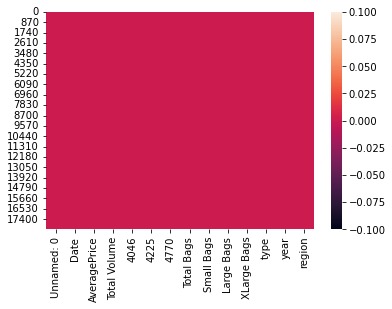

In [10]:
sns.heatmap(df.isnull())

Plotting the null values using the heatmap

In [11]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

value counts of the unique values in region column

In [12]:
np.unique(df['region'])

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

Unnique values in region column

In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)  #dropping 'Unamed:0' beacuse it just showing the index nothing more than that.

In [14]:
# creating a separate columns for the month and date as year is already present in the dataset 

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  Day  
0  Albany     12   27  
1  Albany     12   20  
2  Albany     12   13  
3  Albany     12    6  
4  Albany     11   29

#### Relation between the Average Price according to the different dates

<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

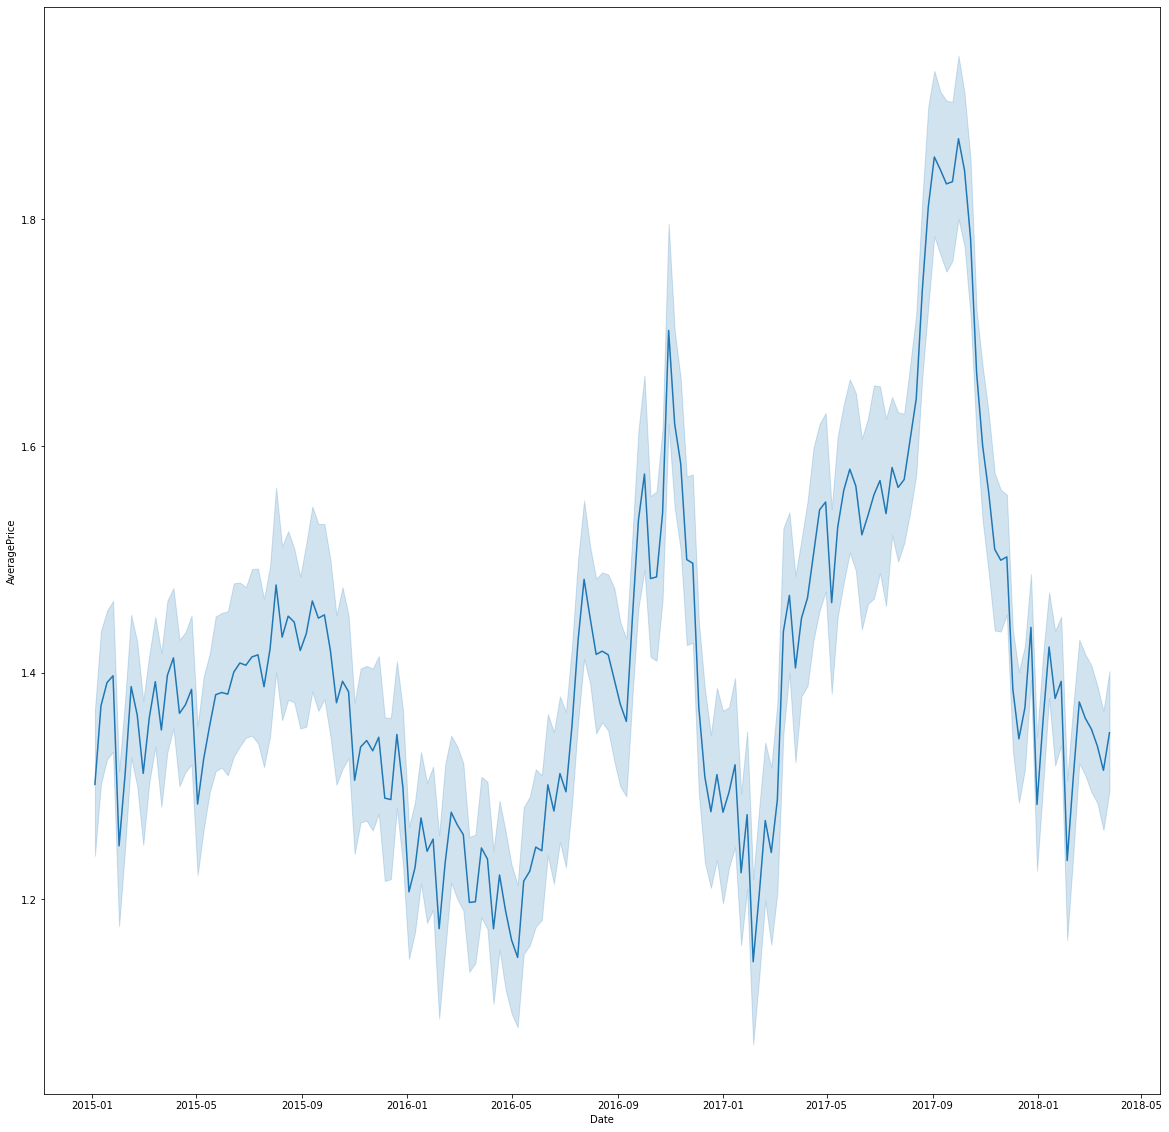

In [15]:
plt.figure(figsize=(20,20))
sns.lineplot(df['Date'],df['AveragePrice'])

#### Variation in the Average Price according to the month

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

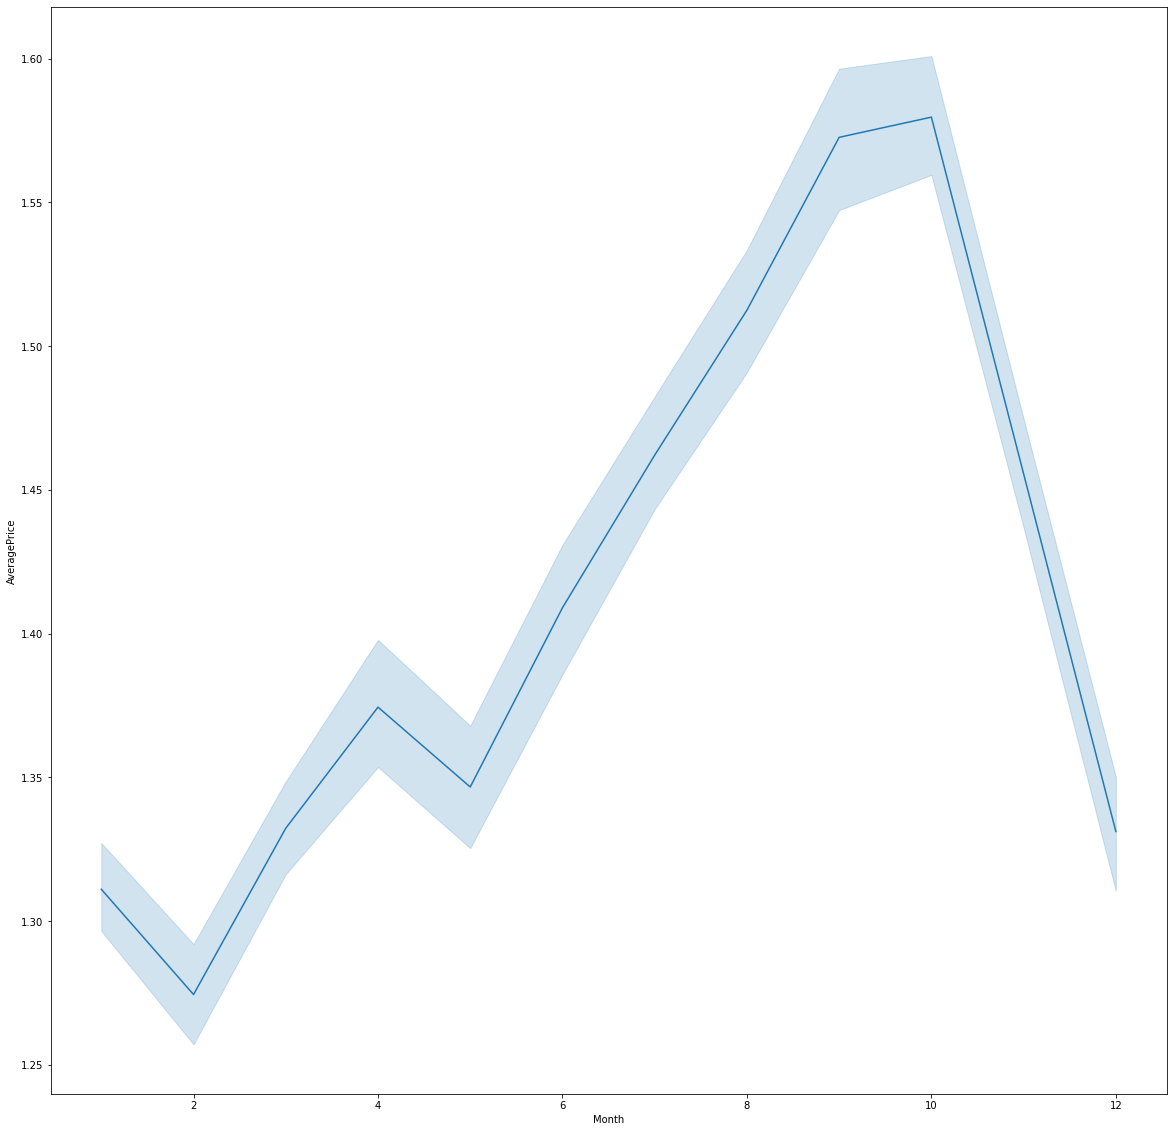

In [16]:
plt.figure(figsize=(20,20))
sns.lineplot(df['Month'],df['AveragePrice'])

We can clearly see the hike in 8 to 10 i.e Aug-Oct

#### Relation between the Average Price according to the dates in a month

<AxesSubplot:xlabel='Day', ylabel='AveragePrice'>

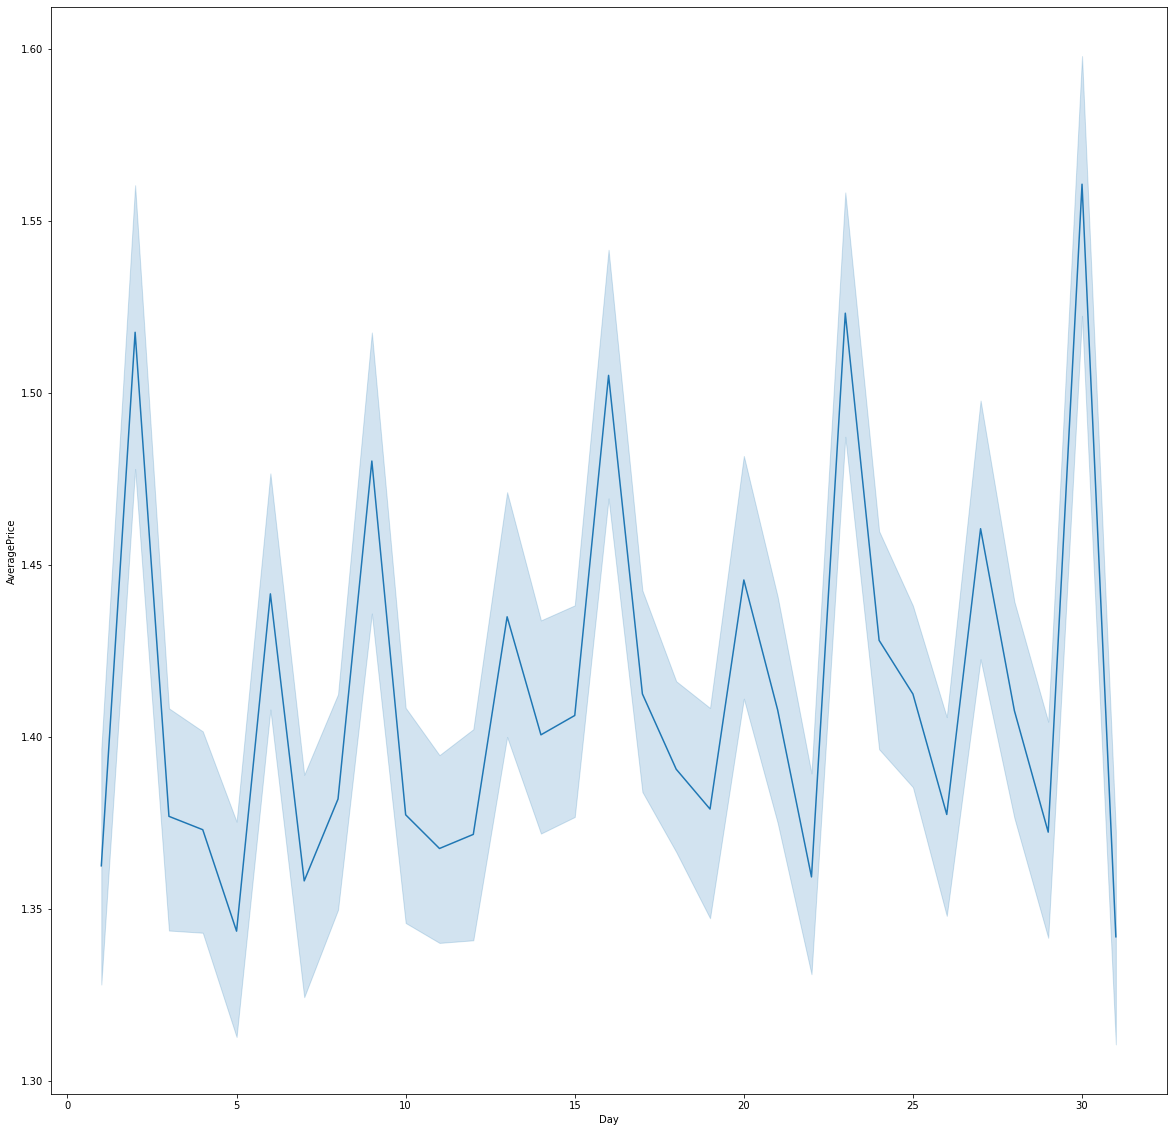

In [17]:
plt.figure(figsize=(20,20))
sns.lineplot(df['Day'],df['AveragePrice'])

#### Which region has the highest average price?

Text(0.5, 1.0, 'Average Price According to Region')

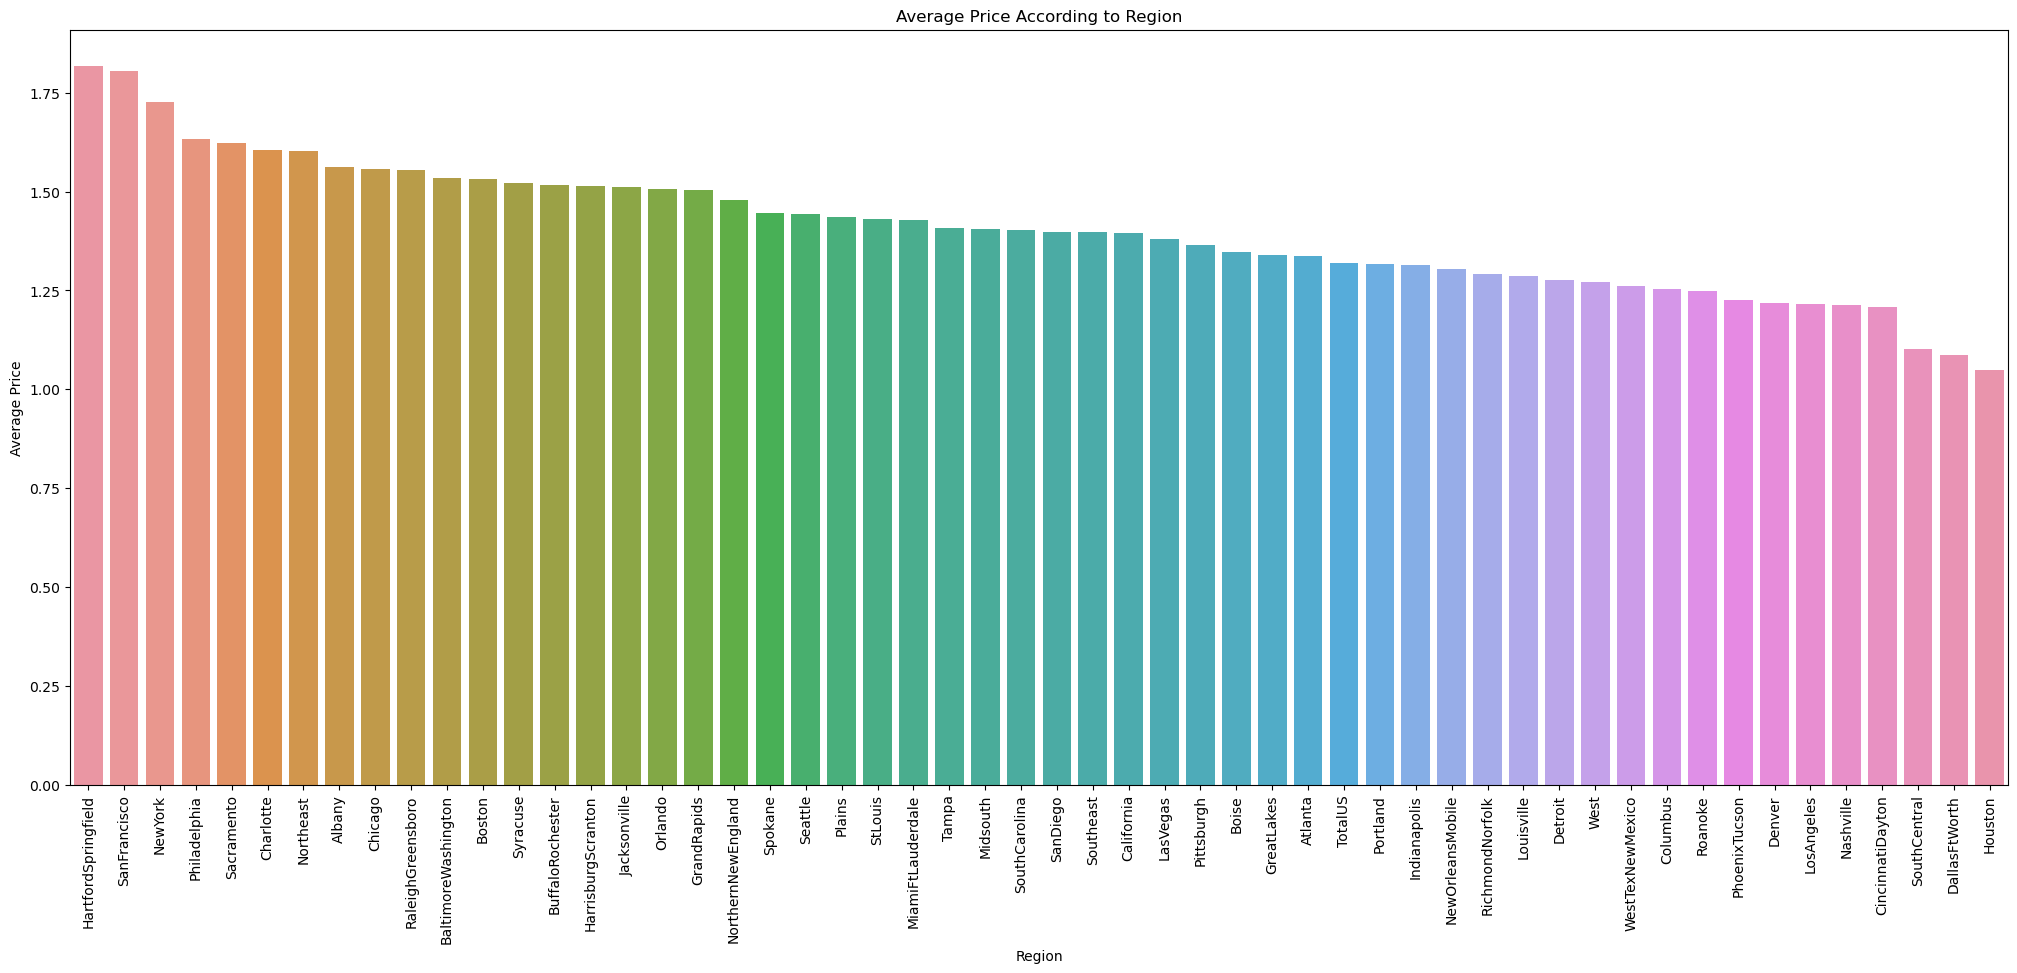

In [18]:
byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(25,10),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["AveragePrice"],data = byRegion)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

Hart Ford Spring Field has the highest average price

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

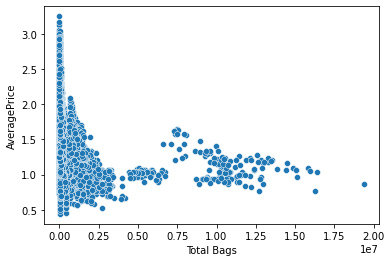

In [19]:
sns.scatterplot(df['Total Bags'],df['AveragePrice'])

Most of the data is on the lower side

#### Average Price along the different regions in different years

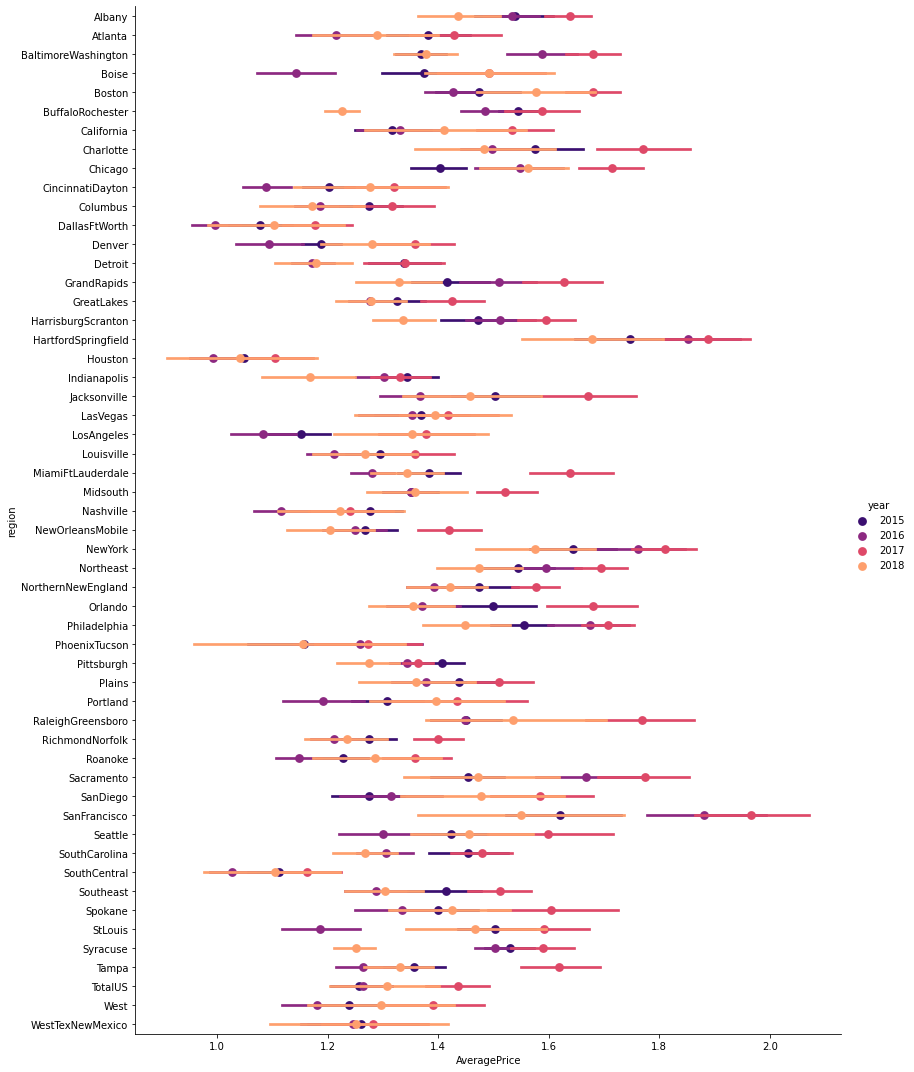

In [20]:
sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   aspect=0.8,
                   height=15,
                   palette='magma',
                   join=False,
              )

#### Average Price of two types of avocado in different regions

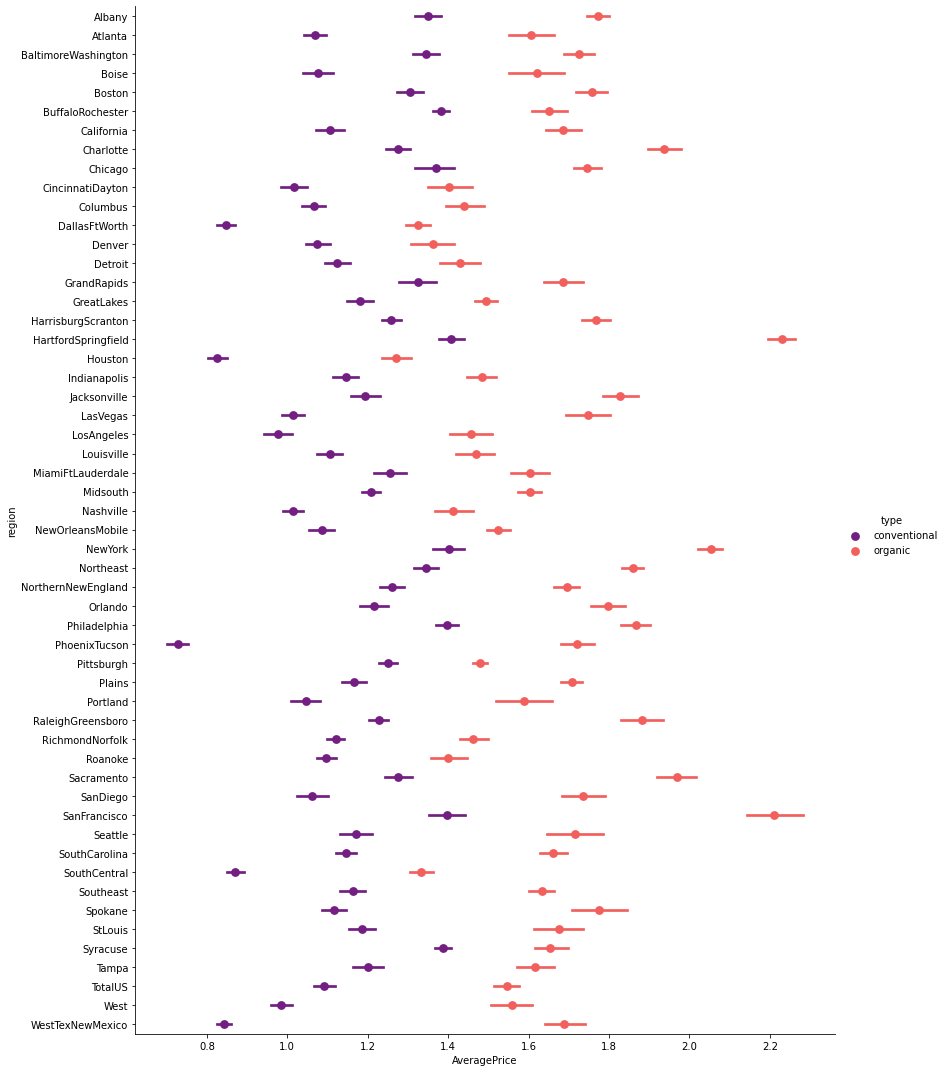

In [21]:
sns.factorplot('AveragePrice','region',data=df,
                   hue='type',
                   aspect=0.8,
                   height=15,
                   palette='magma',
                   join=False,
              )

Average Price according to the type

Text(0.5, 1.0, 'Average Price According to Type')

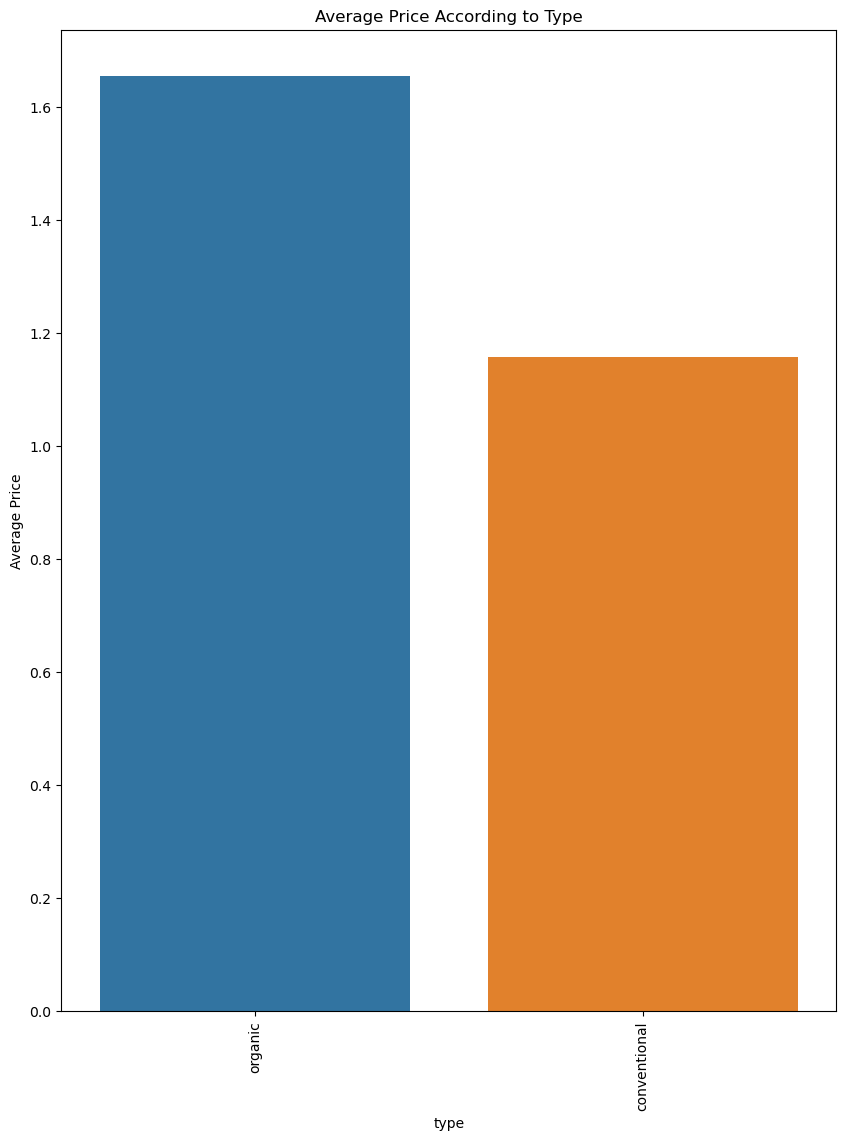

In [22]:
bytype=df.groupby('type').mean()
bytype.sort_values(by=['AveragePrice'], ascending=False, inplace=True)
plt.figure(figsize=(10,13),dpi=100)
sns.barplot(x = bytype.index,y=bytype["AveragePrice"],data = bytype)
plt.xticks(rotation=90)
plt.xlabel('type')
plt.ylabel('Average Price')
plt.title('Average Price According to Type')

Organic is more expensive than conventional

Text(0.5, 1.0, 'Total Volume According to Region')

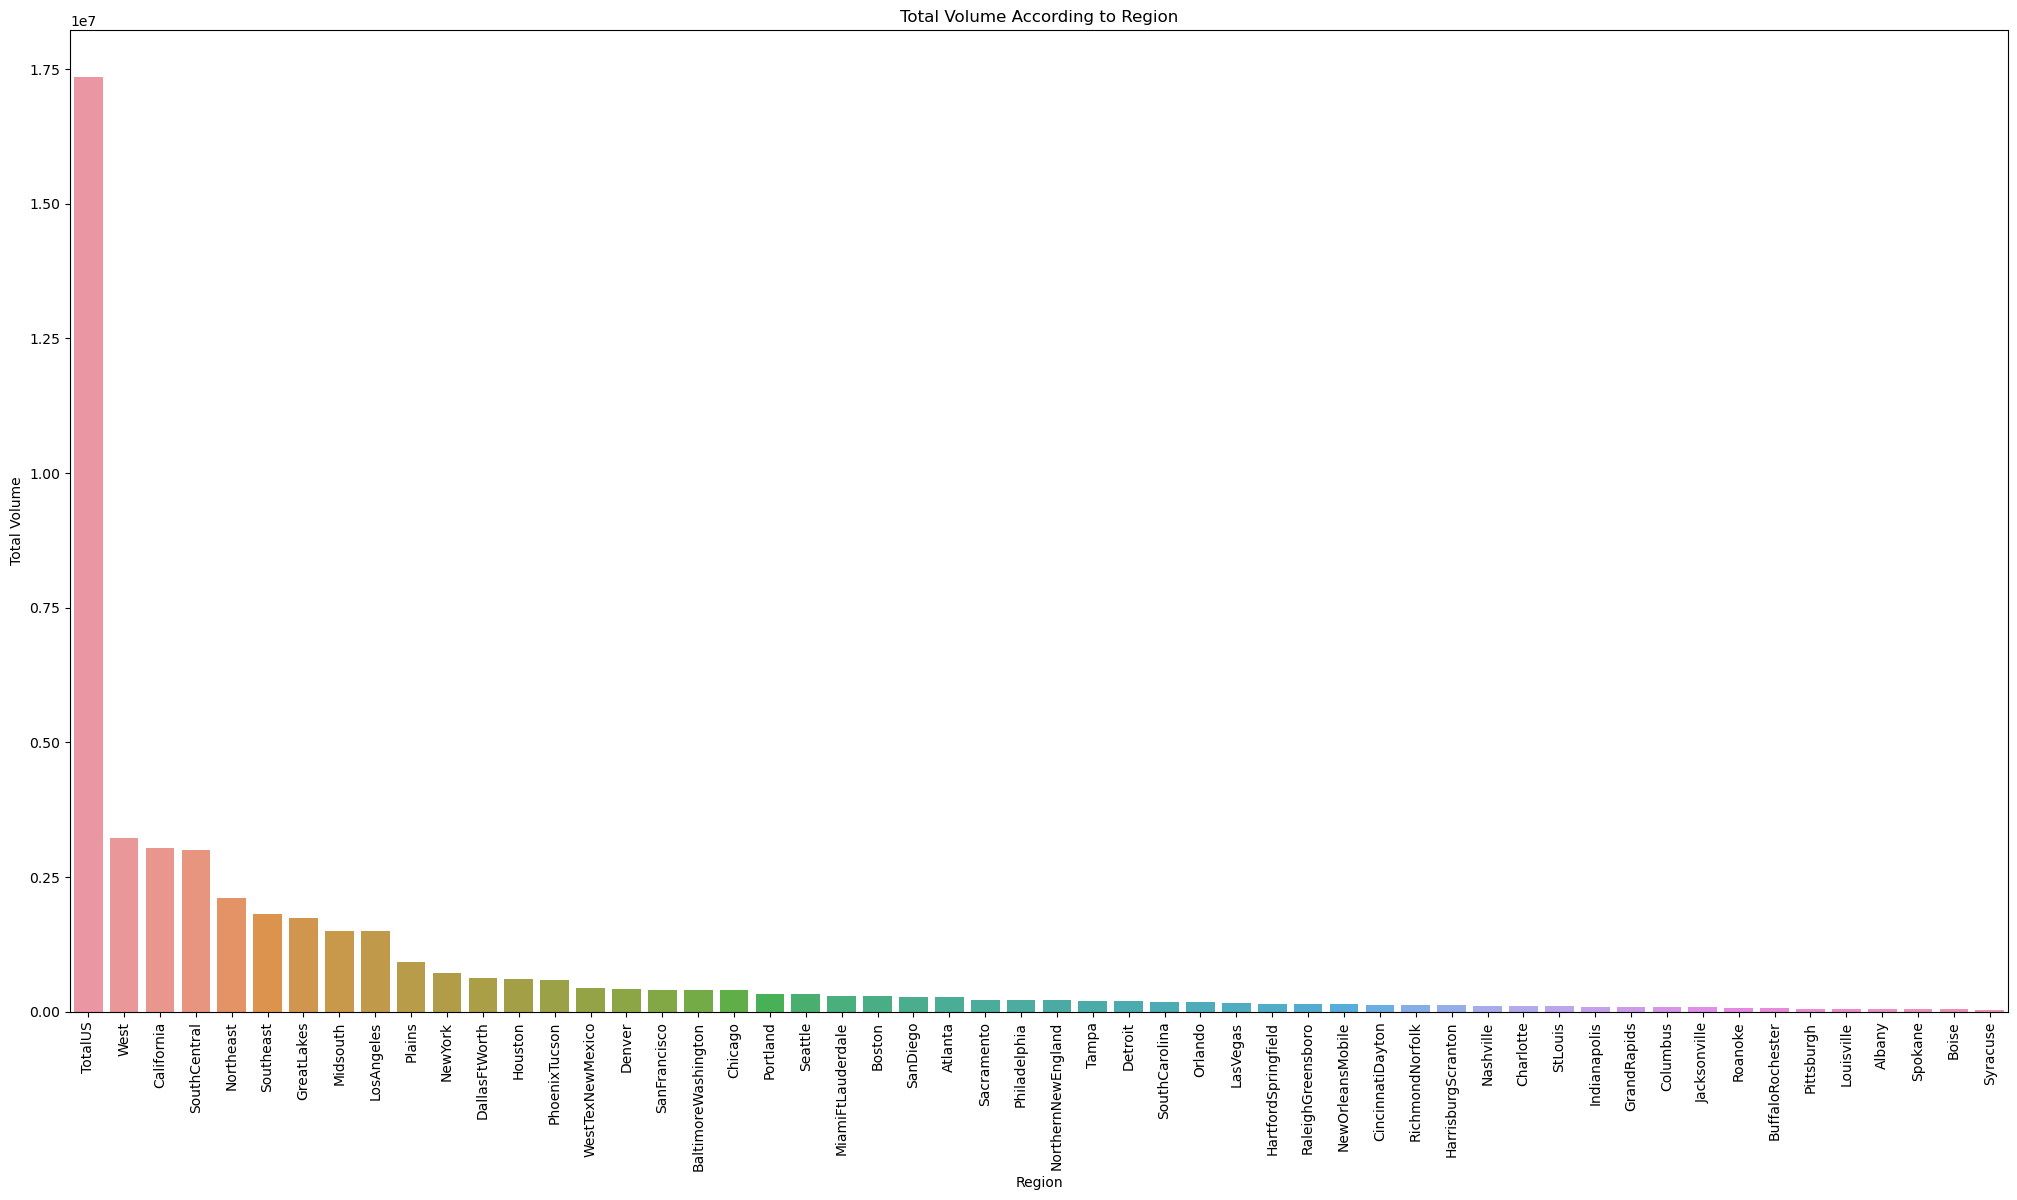

In [23]:
byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['Total Volume'], ascending=False, inplace=True)
plt.figure(figsize=(25,13),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["Total Volume"],data = byRegion)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume According to Region')

Total US has the consumption of around 1.75 le7

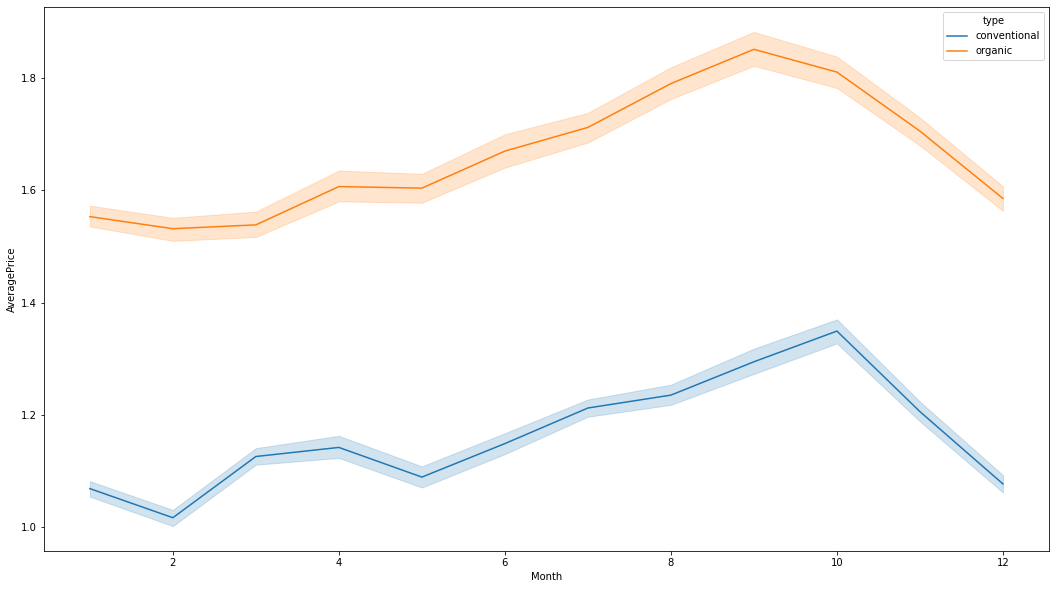

In [24]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

Both organic and conventional type have the hike in avg prices in the month of aug to oct

<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

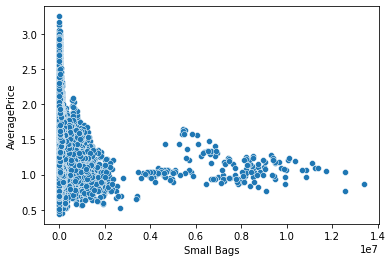

In [25]:
sns.scatterplot(df['Small Bags'],df['AveragePrice'])

Most of the data is on the lower side

<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

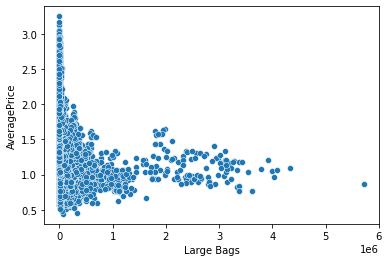

In [26]:
sns.scatterplot(df['Large Bags'],df['AveragePrice'])

Most of the data is on the lower side

<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

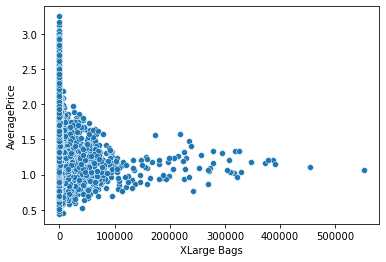

In [27]:
sns.scatterplot(df['XLarge Bags'],df['AveragePrice'])

Most of the data is on the lower side

Text(0.5, 1.0, 'Small Bags According to Region')

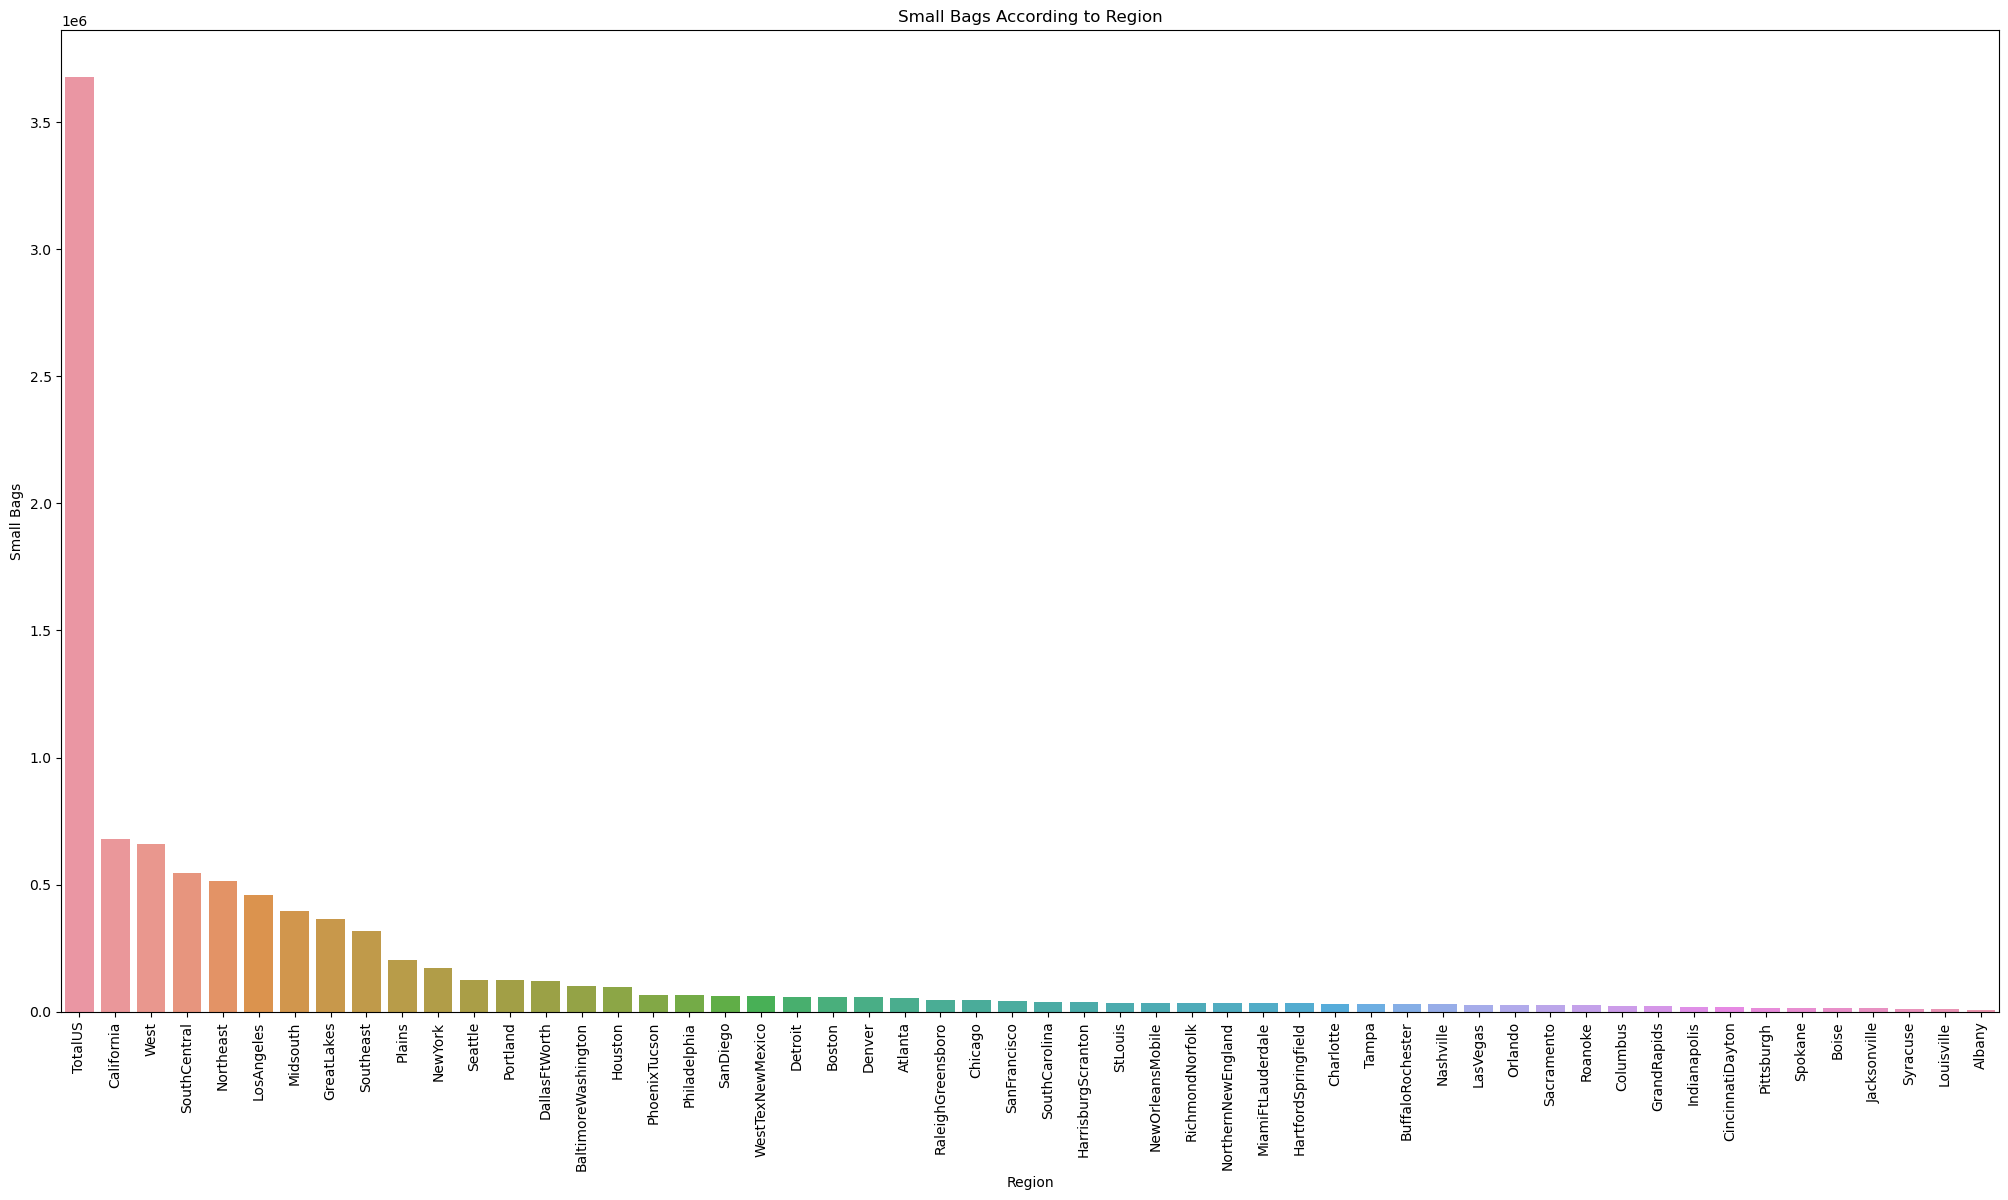

In [28]:
byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['Small Bags'], ascending=False, inplace=True)
plt.figure(figsize=(25,13),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["Small Bags"],data = byRegion)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Small Bags')
plt.title('Small Bags According to Region')

California has the highest consumption of small bags of consumption

Text(0.5, 1.0, 'Large Bags According to Region')

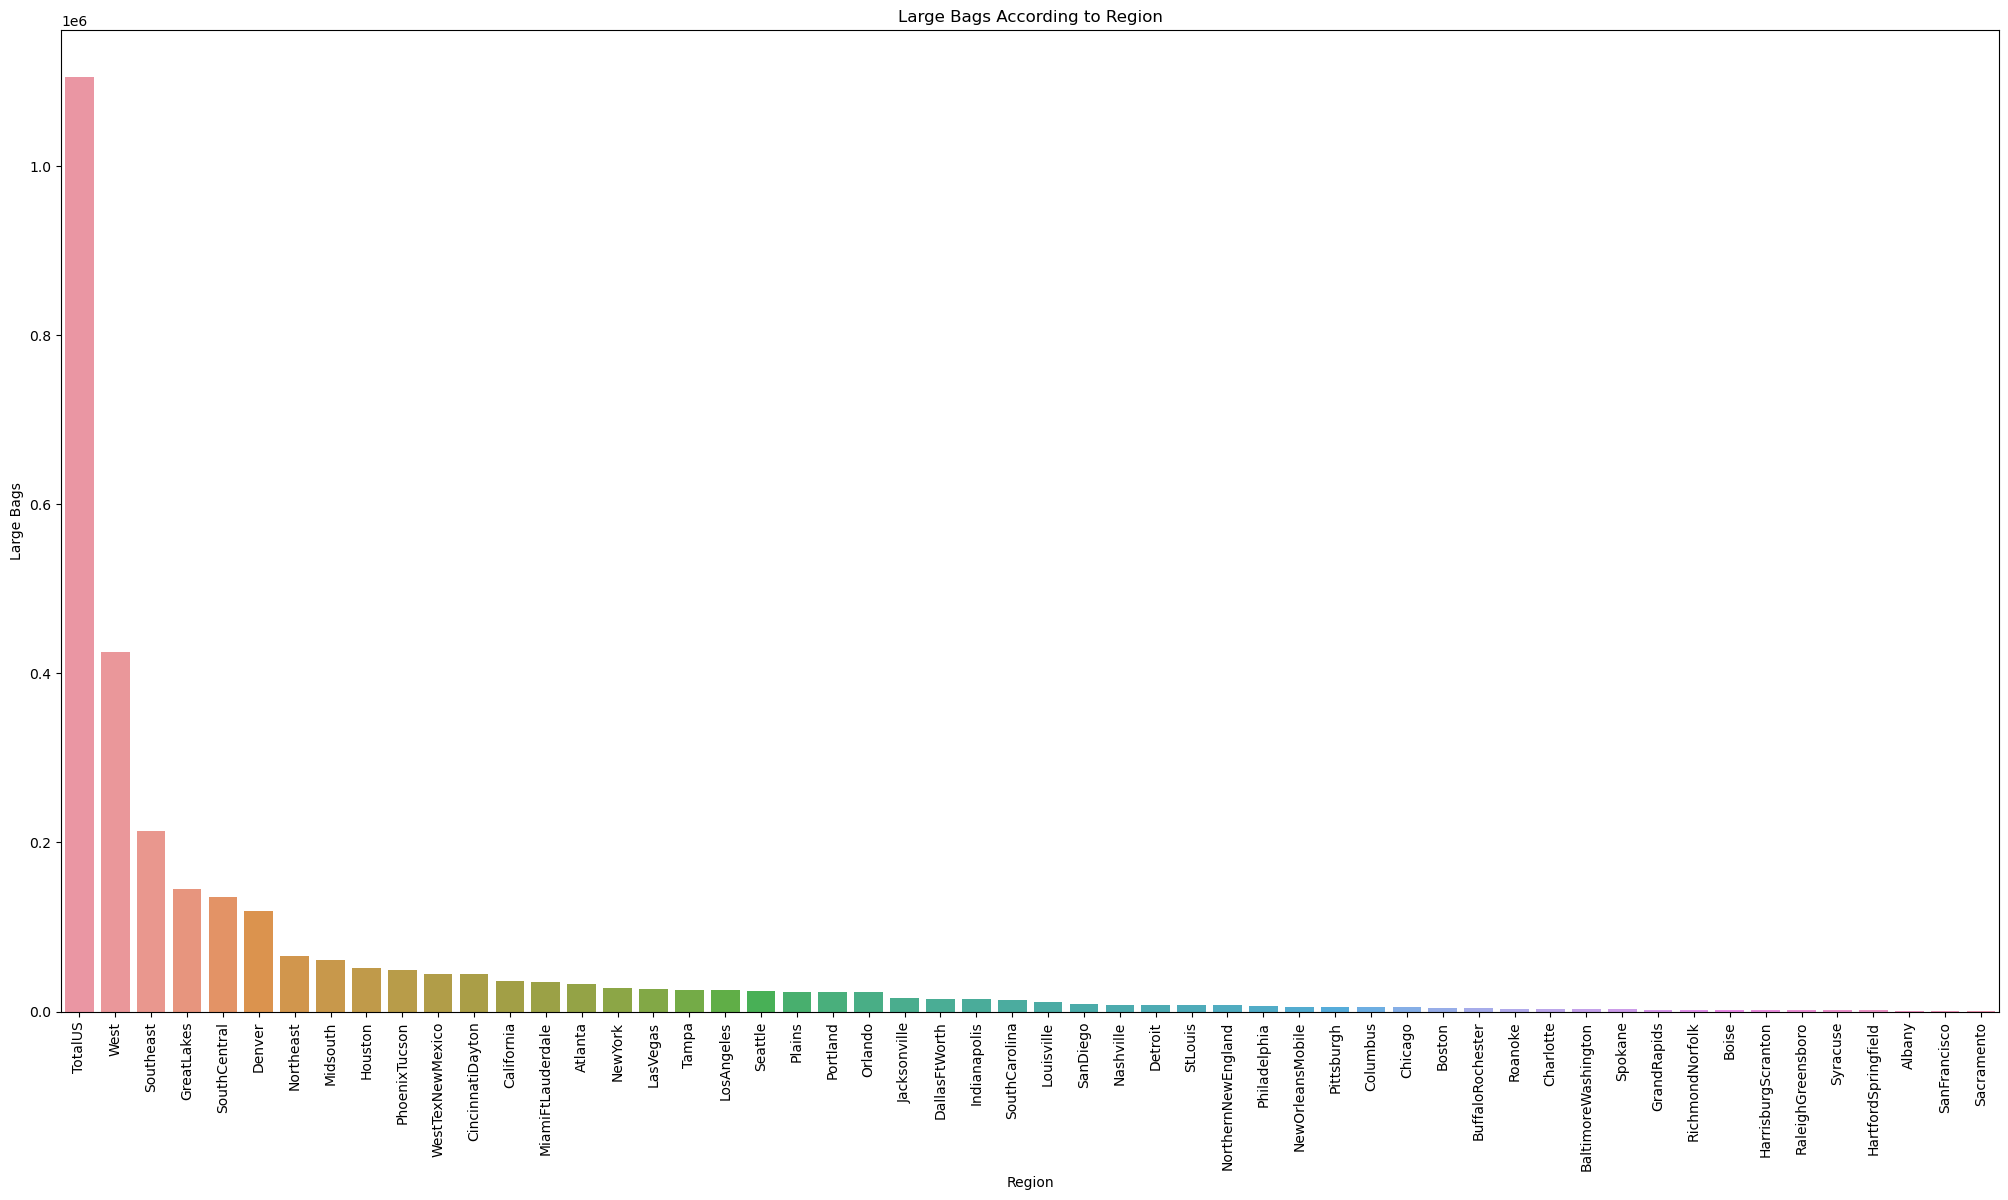

In [29]:
byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['Large Bags'], ascending=False, inplace=True)
plt.figure(figsize=(25,13),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["Large Bags"],data = byRegion)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Large Bags')
plt.title('Large Bags According to Region')

west has the highest consumption of large bags of avocado

Text(0.5, 1.0, 'XLarge Bags According to Region')

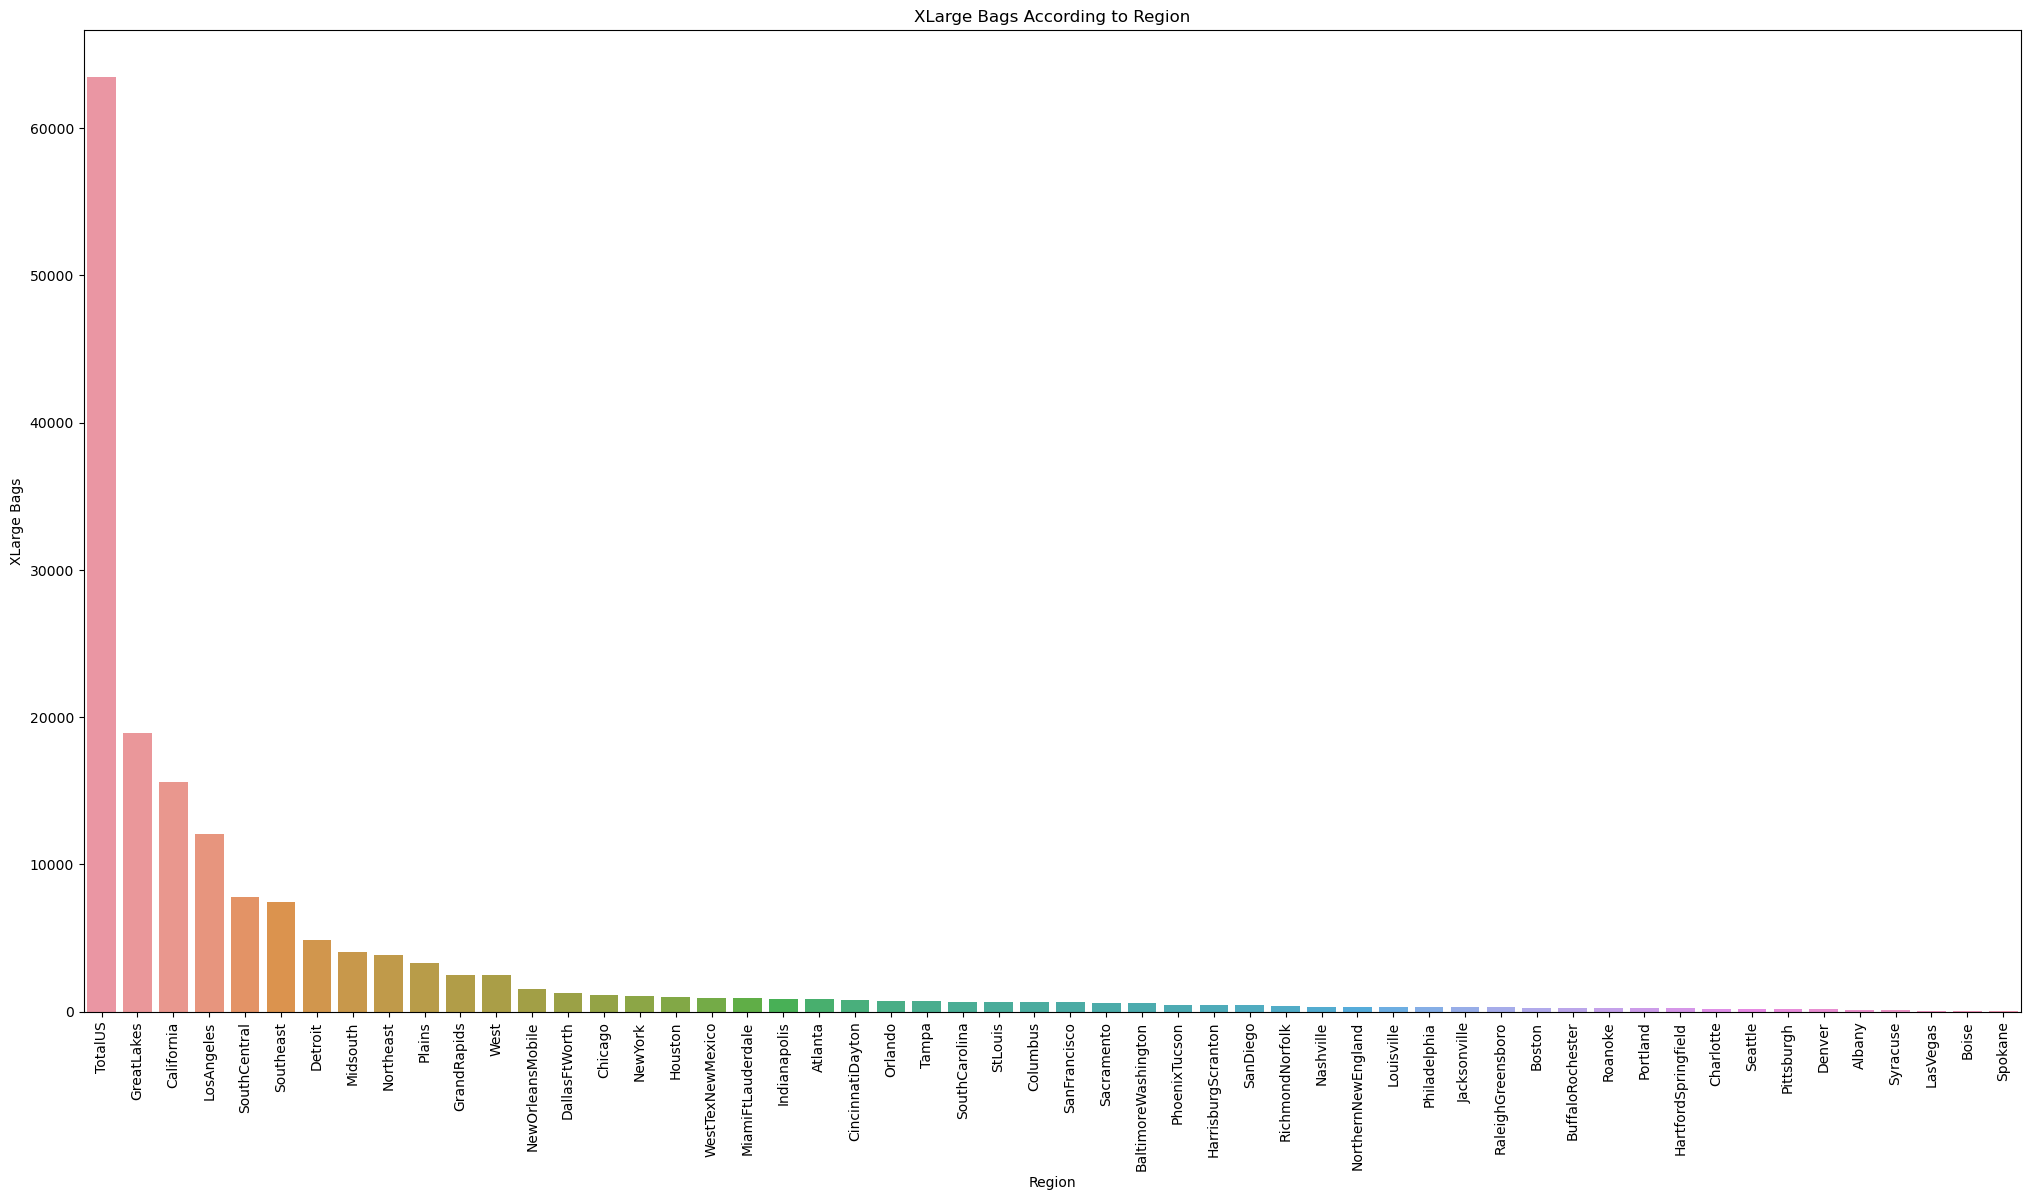

In [30]:
byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['XLarge Bags'], ascending=False, inplace=True)
plt.figure(figsize=(25,13),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["XLarge Bags"],data = byRegion)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('XLarge Bags')
plt.title('XLarge Bags According to Region')

GreatLakes has the highest consumption of XLarge bags of avocado

In [31]:
#dropping the date column as we have different columns for date, month and year

df.drop('Date',axis=1,inplace=True)
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

### Label Encoding

In [32]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

list1=['type','region']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))
    
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0     8603.62       93.25          0.0     0  2015       0     12   27  
1     9408.07       97.49          0.0     0  2015       0     12   20  
2     8042.21      103.14          0.0     0  2015       0     12   13  
3     5677.40      133.76          0.0     0  2015       0     12    6  
4     5986.26      197.69          0.0     0  2015       0     11   29

### Statistical Summary

In [33]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          type  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      0.499918   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.500014   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000      0.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000      0.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000      1.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000      1.000000   

               year        region         Month           Day  
count  18249.000000  18249.000000  18249.000000  18249.000000  
mean    2016.147899     26.495644      6.177215     15.662612  
std        0.939938     15.583788      3.534130      8.776281  
min     2015.000000      0.000000      1.000000      1.000000  
25%     2015.000000     13.000000      3.000000      8.000000  
50%     2016.000000     26.000000      6.000000     16.000000  
75%     2017.000000     40.000000      9.000000     23.000000  
max     2018.000000     53.000000     12.000000     31.000000

Observations

1. There is a very large differences in the mean & std in Xlarge, year column
2. skewness is in the dataset
3. outliers in the dataset

### Correlation

In [34]:
corr=df.corr()
corr

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
type              0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
region           -0.011716      0.174176  0.192073  0.145726  0.095252   
Month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
Day               0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.615845   
Total Volume    0.963047    0.967238    0.880640     0.747157 -0.232434   
4046            0.920057    0.925280    0.838645     0.699377 -0.225819   
4225            0.905787    0.916031    0.810015     0.688809 -0.232289   
4770            0.792314    0.802733    0.698471     0.679861 -0.210027   
Total Bags      1.000000    0.994335    0.943009     0.804233 -0.217788   
Small Bags      0.994335    1.000000    0.902589     0.806845 -0.220535   
Large Bags      0.943009    0.902589    1.000000     0.710858 -0.193177   
XLarge Bags     0.804233    0.806845    0.710858     1.000000 -0.175483   
type           -0.217788   -0.220535   -0.193177    -0.175483  1.000000   
year            0.071552    0.063915    0.087891     0.081033 -0.000032   
region          0.175256    0.164702    0.198768     0.082281 -0.000280   
Month          -0.022724   -0.023126   -0.020187    -0.012969 -0.000085   
Day            -0.004988   -0.003870   -0.008352     0.000319 -0.000013   

                  year    region     Month       Day  
AveragePrice  0.093197 -0.011716  0.162409  0.027386  
Total Volume  0.017193  0.174176 -0.024689 -0.009747  
4046          0.003353  0.192073 -0.025803 -0.010159  
4225         -0.009559  0.145726 -0.022108 -0.012393  
4770         -0.036531  0.095252 -0.033424 -0.009009  
Total Bags    0.071552  0.175256 -0.022724 -0.004988  
Small Bags    0.063915  0.164702 -0.023126 -0.003870  
Large Bags    0.087891  0.198768 -0.020187 -0.008352  
XLarge Bags   0.081033  0.082281 -0.012969  0.000319  
type         -0.000032 -0.000280 -0.000085 -0.000013  
year          1.000000 -0.000055 -0.177050  0.004475  
region       -0.000055  1.000000 -0.000144 -0.000021  
Month        -0.177050 -0.000144  1.000000  0.010621  
Day           0.004475 -0.000021  0.010621  1.000000

<AxesSubplot:>

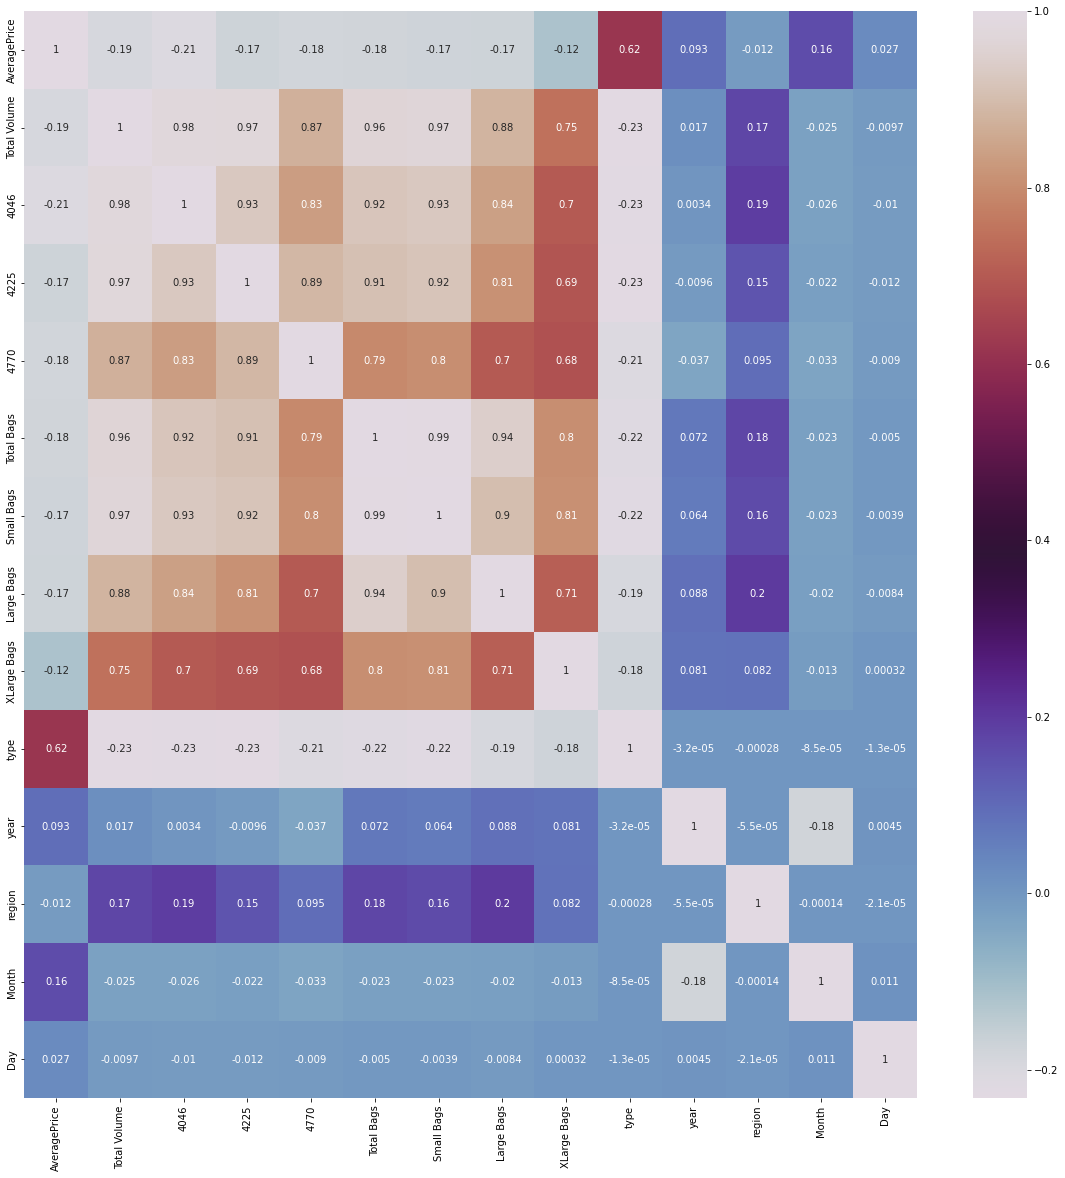

In [35]:
#plotting Correlation using heatmap

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='twilight')

Most of columns are correlated with each other in a very good way

In [36]:
#correlation of every columm with Average Price
corr['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
Day             0.027386
year            0.093197
Month           0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

In [37]:
#correlation of each column with the region column
corr['region'].sort_values()

AveragePrice   -0.011716
type           -0.000280
Month          -0.000144
year           -0.000055
Day            -0.000021
XLarge Bags     0.082281
4770            0.095252
4225            0.145726
Small Bags      0.164702
Total Volume    0.174176
Total Bags      0.175256
4046            0.192073
Large Bags      0.198768
region          1.000000
Name: region, dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

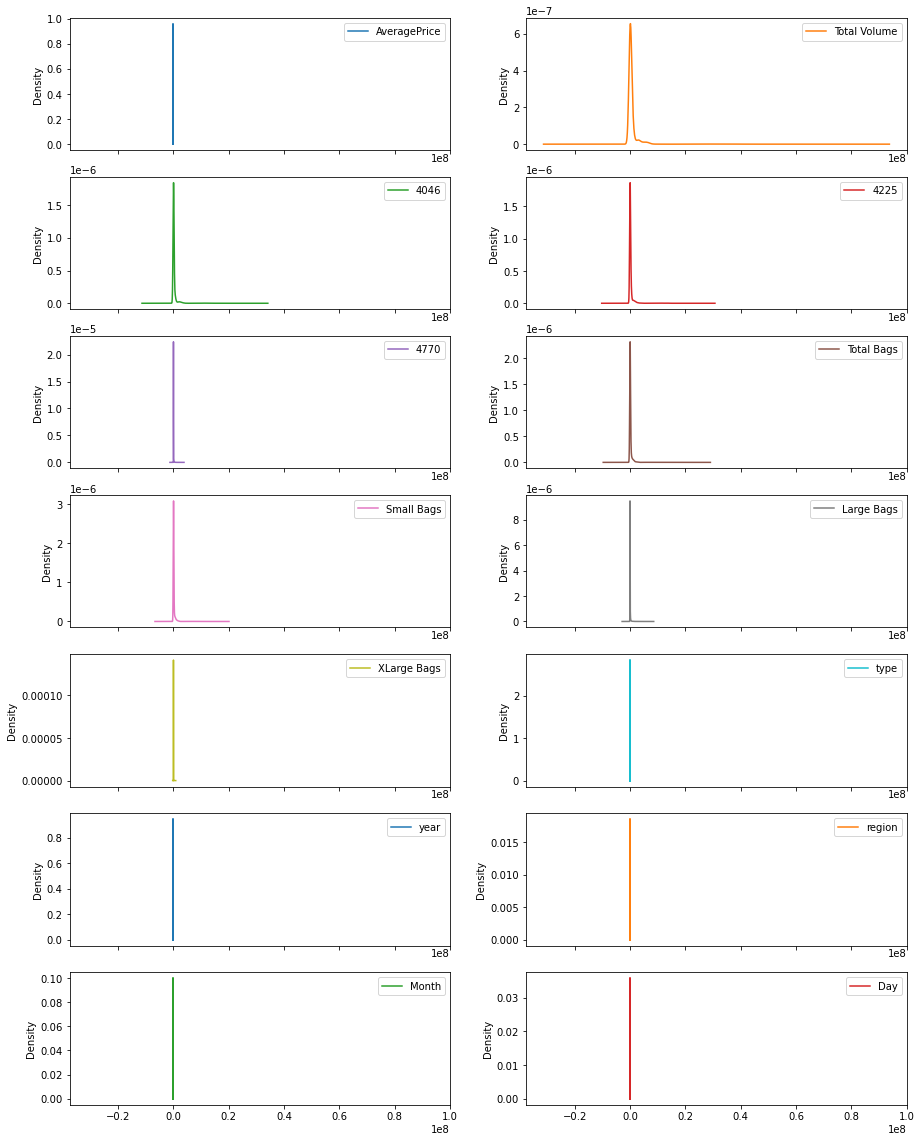

In [38]:
df.plot(kind='kde',subplots=True,layout=(7,2),figsize=(15,20))

A rough idea about the skewness

#### Plotting the outliers

AveragePrice       AxesSubplot(0.125,0.787927;0.352273x0.0920732)
Total Volume    AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
4046               AxesSubplot(0.125,0.677439;0.352273x0.0920732)
4225            AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
4770               AxesSubplot(0.125,0.566951;0.352273x0.0920732)
Total Bags      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
Small Bags         AxesSubplot(0.125,0.456463;0.352273x0.0920732)
Large Bags      AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
XLarge Bags        AxesSubplot(0.125,0.345976;0.352273x0.0920732)
type            AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
year               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
region          AxesSubplot(0.547727,0.235488;0.352273x0.0920732)
Month                 AxesSubplot(0.125,0.125;0.352273x0.0920732)
Day                AxesSubplot(0.547727,0.125;0.352273x0.0920732)
dtype: object

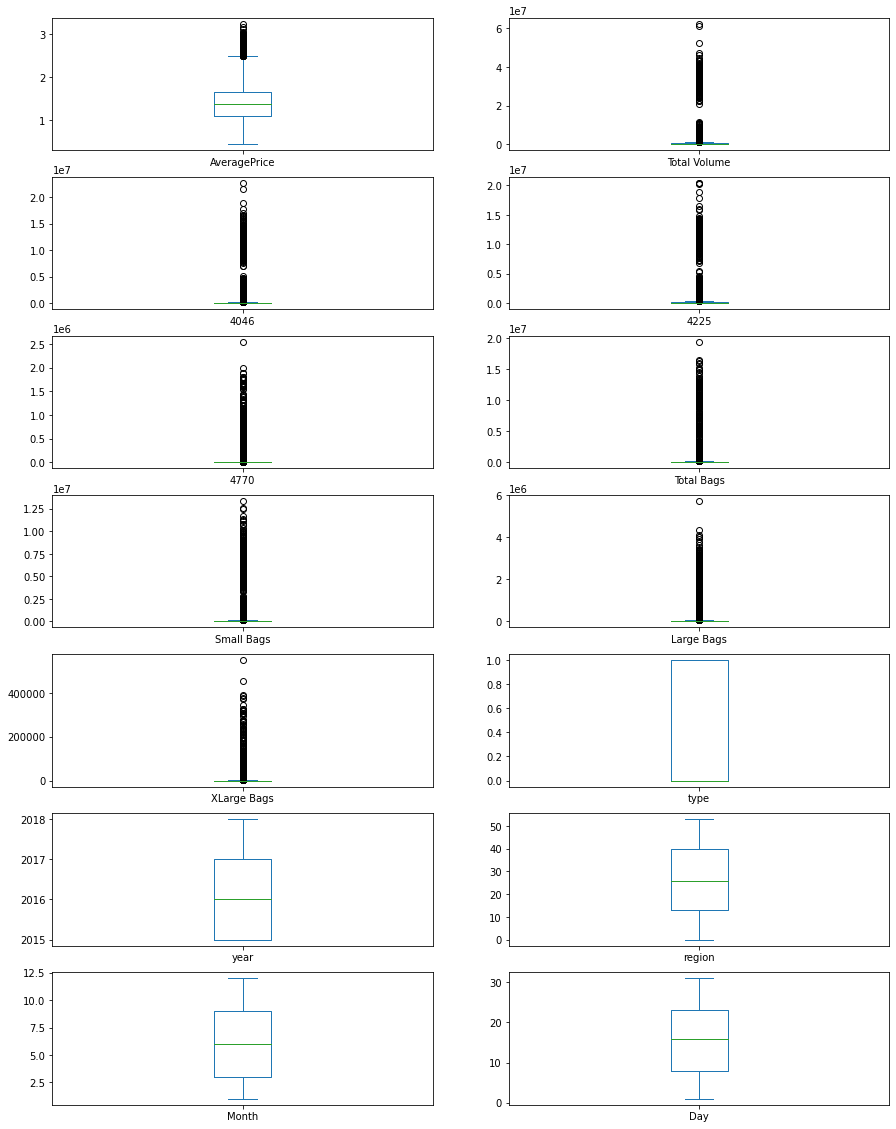

In [39]:
df.plot(kind='box',subplots=True,layout=(7,2),figsize=(15,20))

There are outliers present in the dataset 

#### Checking the skewness

In [40]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

In [42]:
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0         8603.62       93.25          0.0     0  2015       0     12   27  
1         9408.07       97.49          0.0     0  2015       0     12   20  
2         8042.21      103.14          0.0     0  2015       0     12   13  
3         5677.40      133.76          0.0     0  2015       0     12    6  
4         5986.26      197.69          0.0     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244    13066.82      431.85          0.0     1  2018      53      2    4  
18245     8940.04      324.80          0.0     1  2018      53      1   28  
18246     9351.80       42.31          0.0     1  2018      53      1   21  
18247    10919.54       50.00          0.0     1  2018      53      1   14  
18248    11988.14       26.01          0.0     1  2018      53      1    7  

[18249 rows x 14 columns]

In [ ]:
#separating the dependent and independent variables

y=df.iloc[:,0]
x=df.iloc[:,1:]

In [44]:
x

Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags  type  year  region  Month  Day  
0           93.25          0.0     0  2015       0     12   27  
1           97.49          0.0     0  2015       0     12   20  
2          103.14          0.0     0  2015       0     12   13  
3          133.76          0.0     0  2015       0     12    6  
4          197.69          0.0     0  2015       0     11   29  
...           ...          ...   ...   ...     ...    ...  ...  
18244      431.85          0.0     1  2018      53      2    4  
18245      324.80          0.0     1  2018      53      1   28  
18246       42.31          0.0     1  2018      53      1   21  
18247       50.00          0.0     1  2018      53      1   14  
18248       26.01          0.0     1  2018      53      1    7  

[18249 rows x 13 columns]

In [45]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [46]:
#importing the different machine learning models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [47]:
# defining the different models

lg=LinearRegression()
rdr=RandomForestRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

#### FInding the best random state

In [48]:
model=[lg,rdr,svr,dtr,knr]
maxAcc=0
maxRS=0
for i in range(30,70):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is', maxAcc , 'on random state', maxRS)

Best Accuracy score is 0.45606843365521943 on random state 66


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=66,test_size=.30)

#### Linear regression

In [50]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=r2_score(y_test,pred1)
print('Accuracy Score: ',acc)

Accuracy Score:  0.45606843365521943


#### Decision Tree regressor

In [51]:
dtr.fit(x_train,y_train)
pred2=dtr.predict(x_test)
acc=r2_score(y_test,pred2)
print('Accuracy Score: ',acc)

Accuracy Score:  0.7354242330689604


#### Support vector regressor

In [52]:
svr.fit(x_train,y_train)
pred3=svr.predict(x_test)
acc=r2_score(y_test,pred3)
print('Accuracy Score: ',acc)

Accuracy Score:  0.35896568261066175


#### KNeighbor regressor

In [53]:
knr.fit(x_train,y_train)
pred4=knr.predict(x_test)
acc=r2_score(y_test,pred4)
print('Accuracy Score: ',acc)

Accuracy Score:  0.6629391654291849


#### Random forest regressor

In [54]:
rdr.fit(x_train,y_train)
pred5=rdr.predict(x_test)
acc=r2_score(y_test,pred5)
print('Accuracy Score: ',acc)

Accuracy Score:  0.8864220004820916


#### Cross Val Score

In [55]:
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(rdr,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  -143.95142959805614
at cv=  3
cross val score =  -4.4958715283527875
at cv=  4
cross val score =  5.95245179983587
at cv=  5
cross val score =  21.013017136604827
at cv=  6
cross val score =  8.58845071269791
at cv=  7
cross val score =  28.615578451186856


#### Hypermeter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# creating parameters
para={'max_features':['auto','sqrt','log2'],
      'criterion':['squared_error', 'absolute_error', 'poisson']}

GCV=GridSearchCV(rdr,para,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

In [57]:
GCV_pred=GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.8990989867904575

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
l1=[pred1,pred2,pred3,pred4,pred5]
for i in l1:
    print('error:')

    print('mean absolute error: ',mean_absolute_error(y_test,i))
    print('mean squared error: ',mean_squared_error(y_test,i))
    print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,i)))
    print('\n')

error:
mean absolute error:  0.22978381236663217
mean squared error:  0.08880938234457948
root mean squared error:  0.2980090306426627


error:
mean absolute error:  0.13239086757990867
mean squared error:  0.043198100456621
root mean squared error:  0.20784152726686023


error:
mean absolute error:  0.24673275975666115
mean squared error:  0.10466364761948797
root mean squared error:  0.3235176156246951


error:
mean absolute error:  0.1661358904109589
mean squared error:  0.055032960730593605
root mean squared error:  0.23459104997973304


error:
mean absolute error:  0.09396089497716896
mean squared error:  0.018544229842922377
root mean squared error:  0.136177200158185




We found the least errors in the Random Forest Regressor Model

In [58]:
import pickle
filename='avgpriceavocado_.pkl'
pickle.dump(lg, open(filename,'wb'))

In [59]:
a=np.array(y_test)
pred=np.array(pred5)
Avg_Price=pd.DataFrame({'Actual':a,'Predicted':pred})
Avg_Price

Actual  Predicted
0       1.18     1.2123
1       0.88     0.9005
2       0.97     0.9877
3       1.18     1.0786
4       0.88     0.8547
...      ...        ...
5470    1.50     1.5081
5471    1.18     1.2152
5472    1.11     1.0775
5473    2.37     2.1760
5474    1.37     1.3286

[5475 rows x 2 columns]

### Now the second angle i.e the classification part

In [60]:
#separating the dependent and independent variables
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [61]:
x

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  
0         8603.62       93.25          0.0     0  2015       0     12  
1         9408.07       97.49          0.0     0  2015       0     12  
2         8042.21      103.14          0.0     0  2015       0     12  
3         5677.40      133.76          0.0     0  2015       0     12  
4         5986.26      197.69          0.0     0  2015       0     11  
...           ...         ...          ...   ...   ...     ...    ...  
18244    13066.82      431.85          0.0     1  2018      53      2  
18245     8940.04      324.80          0.0     1  2018      53      1  
18246     9351.80       42.31          0.0     1  2018      53      1  
18247    10919.54       50.00          0.0     1  2018      53      1  
18248    11988.14       26.01          0.0     1  2018      53      1  

[18249 rows x 13 columns]

In [62]:
y

0        27
1        20
2        13
3         6
4        29
         ..
18244     4
18245    28
18246    21
18247    14
18248     7
Name: Day, Length: 18249, dtype: int64

In [63]:
#importing the different machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [64]:
#defining the models 

lg=LogisticRegression()
rdc=RandomForestClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

#### Finding the best Random state

In [65]:
model=[lg,rdc,svc,dtc,knc]
maxAccu=0
bestRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best Accuracy score is', maxAccu , 'on random state', bestRS)

Best Accuracy score is 0.049589041095890414 on random state 51


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=.20)

#### Logistic Regression

In [75]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred1))
print('Classification Report: ','\n',classification_report(y_test,pred1))

Accuracy Score:  0.049589041095890414
Confusion Matrix:  
 [[38  0  4  8  5  4  0  5  0  0  0  0 10  0  0  0  1  9  0  2  0  1  0  6
  27 22  0  0  0  0  0]
 [13  0  0  4  4  0  0  3  0  0  1  1  8  0  0  0  0  6  0  0  0  1  0  3
  22 13  0  0  0  0  0]
 [29  0  4  7  1  2  0  9  0  0  0  5 11  0  0  0  1  4  0  0  0  0  0  5
  35 19  0  0  0  0  0]
 [28  0  1 12  3  3  0  5  0  1  0  2 14  0  0  0  0  9  0  2  0  0  0  4
  52 28  0  0  0  0  0]
 [28  0  1  4  5  1  0  4  0  0  1  6 13  0  0  0  0  8  0  0  0  2  0  8
  34 20  0  1  0  0  0]
 [22  0  1  6  3  3  0  2  0  0  2  0 10  0  0  0  1  2  0  0  0  0  0  3
  22 22  0  0  0  0  0]
 [14  0  1 10  1  3  0  2  0  0  0  2  9  0  1  0  0  4  0  0  0  0  0  3
  32 14  0  0  0  0  0]
 [30  0  5  9  1  1  0  4  0  0  0  7  3  0  0  0  3  5  0  3  0  0  0  8
  35 18  0  0  0  0  0]
 [15  0  0  6  0  0  0  4  0  0  0  1 13  0  0  0  0  4  0  0  0  0  0  3
  20 15  0  0  0  0  0]
 [25  0  1  7  2  0  0  5  0  1  2  3 13  0  0  0  0 10  0 

#### Decision Tree Classifier

In [76]:
dtc.fit(x_train,y_train)
pred2=dtc.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred2))
print('Classification Report: ','\n',classification_report(y_test,pred2))

Accuracy Score:  0.15424657534246575
Confusion Matrix:  
 [[23  0  0  0  0  0  0 25  0  0  0  0  0  0 40  0  0  0  0  0  0 28  0  0
   0  0  0  0 26  0  0]
 [ 0 13  0  0  0  0  0  0 24  0  0  0  0  0  0 19  0  0  0  0  0  0 16  0
   0  0  0  0  0  7  0]
 [ 0  0 18  0  0  0  0  0  0 45  0  0  0  0  0  0 25  0  0  0  0  0  0 22
   0  0  0  0  0  0 22]
 [ 0  0  0 37  0  0  0  0  0  0 47  0  0  0  0  0  0 44  0  0  0  0  0  0
  36  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0 33  0  0  0  0  0  0 42  0  0  0  0  0
   0 38  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  0  0  0  0 36  0  0  0  0  0  0 29  0  0  0  0
   0  0 15  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  0  0 33  0  0  0  0  0  0 28  0  0  0
   0  0  0 19  0  0  0]
 [35  0  0  0  0  0  0 17  0  0  0  0  0  0 34  0  0  0  0  0  0 27  0  0
   0  0  0  0 19  0  0]
 [ 0 26  0  0  0  0  0  0 12  0  0  0  0  0  0 22  0  0  0  0  0  0 13  0
   0  0  0  0  0  8  0]
 [ 0  0 34  0  0  0  0  0  0 22  0  0  0  0  0  0 31  0  0  

#### Support Vector classifier

In [77]:
svc.fit(x_train,y_train)
pred3=svc.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred3))
print('Classification Report: ','\n',classification_report(y_test,pred3))

Accuracy Score:  0.04246575342465753
Confusion Matrix:  
 [[  1   0   0   9   0   0   0   0   0   0 129   0   0   0   0   0   0   3
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0  78   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   6   0   0   0   0   0   0 124   0   0   0   1   0   0   1
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   6   1   0   1   0   0   0 154   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   5   0   0   0   0   0   2 125   1   0   0   0   0   0   2
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   1   2   0   0   0   0   0   0  93   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   5   0   0   0   0   0   0  88   0   0   0   0   0   0   2
    0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  3   0   0   6   0   0   0   0   0  

#### Random Forest classifer

In [78]:
rdc.fit(x_train,y_train)
pred4=rdc.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred4))
print('Classification Report: ','\n',classification_report(y_test,pred4))

Accuracy Score:  0.07753424657534247
Confusion Matrix:  
 [[22  0  0  0  0  0  0 38  0  0  0  0  0  0 37  0  0  0  0  0  0 27  0  0
   0  0  0  0 18  0  0]
 [ 0  7  0  0  0  0  0  0 26  0  1  0  0  0  0 22  0  0  0  0  0  0  7  0
   0  0  0  0  0 16  0]
 [ 0  0 12  0  0  0  0  0  0 50  0  0  0  0  0  0 30  0  0  0  0  0  0 29
   0  1  0  0  0  0 10]
 [ 0  0  0 23  0  0  1  0  0  0 70  0  0  0  0  0  0 42  0  0  0  0  0  0
  28  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0  0 49  0  0  0  0  0  0 52  0  0  0  0  0
   0 28  0  0  0  0  0]
 [ 0  0  1  0  0 12  0  0  0  0  0  0 41  0  0  0  0  0  0 25  0  0  0  0
   0  0 19  1  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0 36  0  0  0  0  0  0 25  0  0  1
   0  0  0 21  0  0  0]
 [46  0  1  0  0  0  0 12  0  0  0  0  0  0 34  0  0  0  0  0  0 28  0  0
   0  0  0  0 11  0  0]
 [ 0 32  0  0  0  0  0  0  2  0  0  0  0  0  0 25  0  0  0  0  0  0 14  0
   0  0  0  0  0  8  0]
 [ 0  0 44  0  0  0  0  0  0  8  0  0  0  0  0  0 37  0  0  

#### KNeighbor Classifier

In [79]:
knc.fit(x_train,y_train)
pred5=knc.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred5))
print('Classification Report: ','\n',classification_report(y_test,pred5))

Accuracy Score:  0.0273972602739726
Confusion Matrix:  
 [[12  8 17 21 16  9  9  8  3  6  2  4  2  1  4  0  2  2  2  1  1  3  1  1
   1  3  0  1  1  1  0]
 [ 7  8  6 14  3  3  5  3  4  2  4  1  2  3  0  0  1  3  0  0  0  0  1  0
   5  3  0  0  0  1  0]
 [28  9  6 12 15  6  3  7  5 14  3  4  2  1  3  1  3  0  1  0  2  1  0  2
   2  2  0  0  0  0  0]
 [25 11 11 11 17 16 15 12  3  5 12  2  1  2  1  0  2  4  1  2  0  2  0  0
   5  2  0  2  0  0  0]
 [22  7 17 16 15  2  4  7  5  6  0  6  1  3  4  1  1  3  0  4  2  0  0  2
   2  3  0  1  0  1  1]
 [15  5  9  7  9  8  8  2 10  2  3  3  5  1  1  0  0  1  0  2  2  1  0  0
   2  0  1  1  0  1  0]
 [12  7  4 16  8  6  3  6  1  2  9  3  1  3  0  0  5  3  0  0  1  0  1  1
   0  0  1  2  0  1  0]
 [29 12 14  9  5  9 10  8  2  6  2  3  3  2  7  0  3  2  1  0  1  2  0  0
   2  0  0  0  0  0  0]
 [ 8 19  7  7  7  0  2  4  1  4  6  1  0  3  1  4  0  1  1  1  0  0  1  1
   1  0  1  0  0  0  0]
 [24  8 26 10  3 13  9  5  3  7  2  2  3  3  2  0  2  1  2  0

#### GaussianNB

In [80]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred6=gnb.predict(x_test)
acc=accuracy_score(y_test,pred6)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred6))
print('Classification Report: ','\n',classification_report(y_test,pred6))

Accuracy Score:  0.0326027397260274
Confusion Matrix:  
 [[  4   0   0   1   0   2   1   1   0   0   0   2   0   0   0   0   0   0
    0   1   0   0   0   0   0   0 130   0   0   0   0]
 [  0   0   0   2   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   1   1  74   0   0   0   0]
 [  0   0   0   1   0   1   0   0   1   1   0   2   0   0   0   0   0   0
    0   0   0   0   0   0   1   2 123   0   0   0   0]
 [  2   0   0   5   0   1   2   0   0   1   0   3   0   0   1   0   0   0
    0   0   0   0   0   0   1   0 148   0   0   0   0]
 [  1   0   1   5   0   1   1   1   0   1   0   2   0   0   0   0   0   0
    0   0   0   0   0   0   1   0 122   0   0   0   0]
 [  2   0   0   5   0   2   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  89   0   0   0   0]
 [  0   0   0   5   0   3   1   0   1   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   1   0  84   0   0   0   0]
 [  4   0   0   1   0   3   2   0   0   

#### Cross Val Score

In [83]:
from sklearn.model_selection import cross_val_score
for i in range(3,6):
    cr=cross_val_score(dtc,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  23.33826511041701
at cv=  4
cross val score =  23.343736666166098
at cv=  5
cross val score =  24.642391798090678


#### Hypermeter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'criterion':['gini','entropy'],
      'max_features':['auto','sqrt','log2']}

GCV=GridSearchCV(dtc,param,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_features': 'sqrt'}

In [86]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.11205479452054795

#### Saving  the model

In [88]:
import pickle
filename='RegionAvocado_.pkl'
pickle.dump(lg, open(filename,'wb'))

#### Conclusion

In [90]:
a=np.array(y_test)
pred=np.array(pred2)
Region_avocado=pd.DataFrame({'Actual':a,'Predicted':pred})
Region_avocado

Actual  Predicted
0         16          9
1         25         18
2         21         14
3         28         28
4          3         10
...      ...        ...
3645       7         14
3646      13         27
3647      16          2
3648       4         25
3649      15          1

[3650 rows x 2 columns]

The second way i.e using the classifcation metod on the region is not successful. The predicted results are so bad and the model accuracy is so poor as well. So in my opinion we should go with the first way in this project or dataset beacuse we can predict the average price more accurately than the region. 